In [1]:
<a href="https://colab.research.google.com/github/Aadhil21/DSGP-Group28/blob/branch-Aadhil/Analyze_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SyntaxError: invalid syntax (1021595565.py, line 1)

# Import Libraries


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
video_name = 'PushUp2.mp4'
video_path = 'Videos/' + video_name
dataset_name = 'pose_landmark_data_' + video_name.split('.')[0] + '.xlsx'
dataset_path = 'Datasets/'

##Read keypoints data

In [4]:
df = pd.read_excel(dataset_path + dataset_name)

##Remove z keypoints

In [5]:
for i in df.columns:
    if i.split('_')[-1] == 'z':
        df.drop(i, axis=1, inplace=True)

In [6]:
df.head()

,Frame_Number,NOSE_Point_x,NOSE_Point_y,NOSE_visibility,LEFT_EYE_INNER_Point_x,LEFT_EYE_INNER_Point_y,LEFT_EYE_INNER_visibility,LEFT_EYE_Point_x,LEFT_EYE_Point_y,LEFT_EYE_visibility,...,LEFT_HEEL_visibility,RIGHT_HEEL_Point_x,RIGHT_HEEL_Point_y,RIGHT_HEEL_visibility,LEFT_FOOT_INDEX_Point_x,LEFT_FOOT_INDEX_Point_y,LEFT_FOOT_INDEX_visibility,RIGHT_FOOT_INDEX_Point_x,RIGHT_FOOT_INDEX_Point_y,RIGHT_FOOT_INDEX_visibility
0,11,0.172681,0.313598,0.999459,0.168347,0.283569,0.999629,0.169163,0.282909,0.999499,...,0.394755,0.649724,0.761759,0.167403,0.634239,0.775647,0.224308,0.630510,0.785381,0.079859
1,12,0.171384,0.325920,0.999407,0.169135,0.290780,0.999529,0.172524,0.287031,0.999359,...,0.378576,0.358859,0.774496,0.155693,0.688360,0.818098,0.248254,0.297742,0.809972,0.083065
2,13,0.166956,0.344291,0.999323,0.169170,0.305753,0.999371,0.174378,0.299845,0.999245,...,0.428402,0.602920,0.744963,0.198360,0.674279,0.849738,0.319854,0.563115,0.842989,0.152828
3,14,0.152157,0.360589,0.999005,0.156891,0.323934,0.999098,0.164263,0.318774,0.998894,...,0.441146,0.632552,0.734129,0.191147,0.666381,0.845441,0.365483,0.618406,0.828718,0.165179
4,15,0.154514,0.375807,0.998804,0.157947,0.339088,0.998869,0.165530,0.333139,0.998589,...,0.462459,0.649224,0.732318,0.193904,0.674033,0.854672,0.416111,0.633172,0.838736,0.192938


##Get column name

In [7]:
num = 0
for i in range(len(df.columns[1:])):
    if i != 0 and i % 2 != 0:
        num += 1
        print(num, df.columns[i], df.columns[i + 1])

1 NOSE_Point_x NOSE_Point_y
2 NOSE_visibility LEFT_EYE_INNER_Point_x
3 LEFT_EYE_INNER_Point_y LEFT_EYE_INNER_visibility
4 LEFT_EYE_Point_x LEFT_EYE_Point_y
5 LEFT_EYE_visibility LEFT_EYE_OUTER_Point_x
6 LEFT_EYE_OUTER_Point_y LEFT_EYE_OUTER_visibility
7 RIGHT_EYE_INNER_Point_x RIGHT_EYE_INNER_Point_y
8 RIGHT_EYE_INNER_visibility RIGHT_EYE_Point_x
9 RIGHT_EYE_Point_y RIGHT_EYE_visibility
10 RIGHT_EYE_OUTER_Point_x RIGHT_EYE_OUTER_Point_y
11 RIGHT_EYE_OUTER_visibility LEFT_EAR_Point_x
12 LEFT_EAR_Point_y LEFT_EAR_visibility
13 RIGHT_EAR_Point_x RIGHT_EAR_Point_y
14 RIGHT_EAR_visibility MOUTH_LEFT_Point_x
15 MOUTH_LEFT_Point_y MOUTH_LEFT_visibility
16 MOUTH_RIGHT_Point_x MOUTH_RIGHT_Point_y
17 MOUTH_RIGHT_visibility LEFT_SHOULDER_Point_x
18 LEFT_SHOULDER_Point_y LEFT_SHOULDER_visibility
19 RIGHT_SHOULDER_Point_x RIGHT_SHOULDER_Point_y
20 RIGHT_SHOULDER_visibility LEFT_ELBOW_Point_x
21 LEFT_ELBOW_Point_y LEFT_ELBOW_visibility
22 RIGHT_ELBOW_Point_x RIGHT_ELBOW_Point_y
23 RIGHT_ELBOW_visibi

##Calculate angle function

In [8]:
# Assuming df is your DataFrame
def calculate_angle(row):
    import math
    row = abs(row)

    # Accessing columns by their index positions (0 to 5) from the row
    radians = math.atan2(row[5] - row[3], row[4] - row[2]) - math.atan2(row[1] - row[3], row[0] - row[2])
    angle = math.degrees(radians)
    if angle < 0:
        angle += 360
    return angle

##New dataframe for angles

In [10]:
Angles_df = pd.DataFrame()
Angles_df['Frame_Number'] = df['Frame_Number']
Angles_df

,Frame_Number
0,11
1,12
2,13
3,14
4,15
...,...
382,393
383,394
384,395
385,396


##Generate angles from keypoints

In [11]:
Angle_At_Right_Elbow = df[[
    'RIGHT_WRIST_Point_x', 'RIGHT_WRIST_Point_y',
    'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
]]

Angles_df['Angle_At_Right_Elbow'] = Angle_At_Right_Elbow.apply(calculate_angle, axis=1)

Angle_At_Left_Elbow = df[[
    'LEFT_WRIST_Point_x', 'LEFT_WRIST_Point_y',
    'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y'
]]
Angles_df['Angle_At_Left_Elbow'] = Angle_At_Left_Elbow.apply(calculate_angle, axis=1)

# Calculate angle at right shoulder
Angle_At_Right_Shoulder = df[[
    'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y'
]]
Angles_df['Angle_At_Right_Shoulder'] = Angle_At_Right_Shoulder.apply(calculate_angle, axis=1)

# Calculate angle at left shoulder
Angle_At_Left_Shoulder = df[[
    'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y'
]]
Angles_df['Angle_At_Left_Shoulder'] = Angle_At_Left_Shoulder.apply(calculate_angle, axis=1)

# Calculate angle at right knee (example)
Angle_At_Right_Knee = df[[
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y',
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y'
]]
Angles_df['Angle_At_Right_Knee'] = Angle_At_Right_Knee.apply(calculate_angle, axis=1)

# Calculate angle at left knee (example)
Angle_At_Left_Knee = df[[
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y',
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y'
]]
Angles_df['Angle_At_Left_Knee'] = Angle_At_Left_Knee.apply(calculate_angle, axis=1)

# Calculate angle at right hip
Angle_At_Right_Hip = df[[
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y'
]]
Angles_df['Angle_At_Right_Hip'] = Angle_At_Right_Hip.apply(calculate_angle, axis=1)

# Calculate angle at left hip
Angle_At_Left_Hip = df[[
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y'
]]
Angles_df['Angle_At_Left_Hip'] = Angle_At_Left_Hip.apply(calculate_angle, axis=1)

# Calculate angle at neck (example)
Angle_At_Neck = df[[
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'NOSE_Point_x', 'NOSE_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
]]
Angles_df['Angle_At_Neck'] = Angle_At_Neck.apply(calculate_angle, axis=1)

## Check correlation

In [12]:
# Assuming df is your DataFrame containing the columns 'Angle_At_Left_Elbow' and 'Angle_At_Right_Elbow'
# Find correlations between columns
correlation_matrix = Angles_df.corr()

# Display correlations
print("Correlation Matrix:")
print(correlation_matrix)

# # Find correlations between columns
# for i in Angles_df.columns:
#     for j in Angles_df.columns:
#         if i != j:
#             correlation = Angles_df[i].corr(Angles_df[j])
#             print(f'Correlation between {i} and {j}: {correlation}')

Correlation Matrix:
                         Frame_Number  Angle_At_Right_Elbow   
Frame_Number                 1.000000              0.043377  \
Angle_At_Right_Elbow         0.043377              1.000000   
Angle_At_Left_Elbow         -0.066802              0.904746   
Angle_At_Right_Shoulder     -0.008526              0.850023   
Angle_At_Left_Shoulder      -0.104664              0.808848   
Angle_At_Right_Knee          0.024445             -0.204681   
Angle_At_Left_Knee           0.543560              0.005525   
Angle_At_Right_Hip          -0.227449              0.559891   
Angle_At_Left_Hip           -0.286308              0.499872   
Angle_At_Neck                0.012444             -0.709739   

                         Angle_At_Left_Elbow  Angle_At_Right_Shoulder   
Frame_Number                       -0.066802                -0.008526  \
Angle_At_Right_Elbow                0.904746                 0.850023   
Angle_At_Left_Elbow                 1.000000                 0.6900

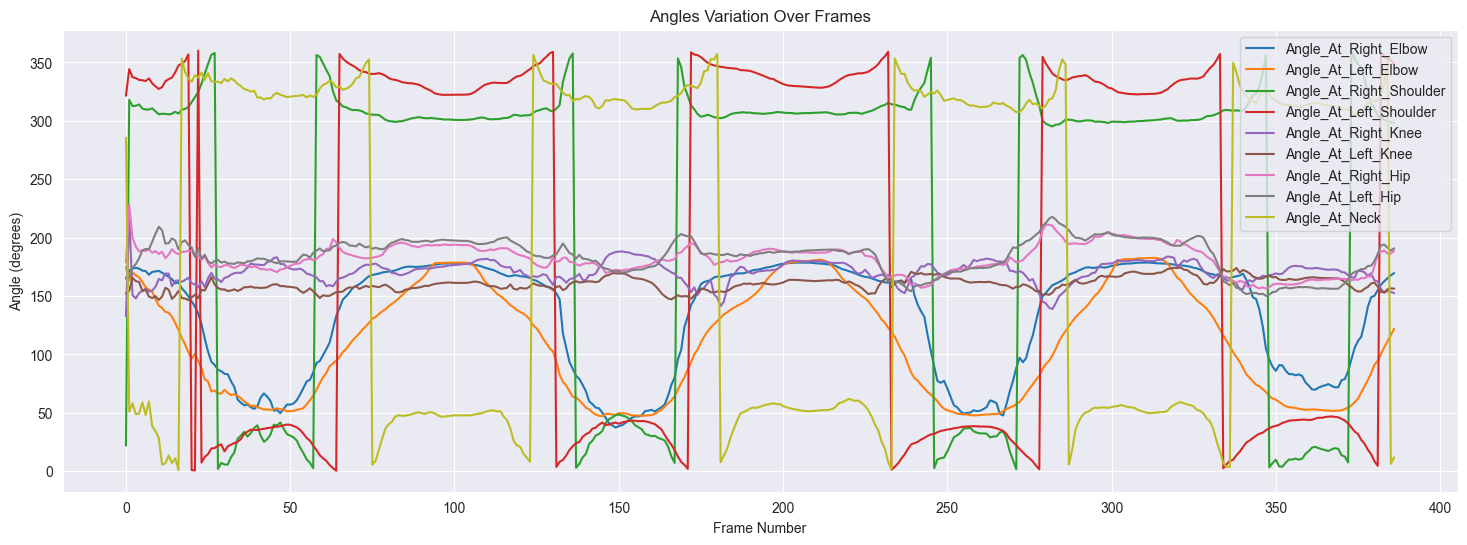

In [13]:
# Set 'Frame_Number' column as the index for easier plotting
Angles_df.set_index('Frame_Number', inplace=False)

# Plot all columns (angles) against the frame number
plt.figure(figsize=(18, 6))  # Adjust figure size as needed
for column in Angles_df.columns:
    if column != 'Frame_Number':
        plt.plot(Angles_df.index, Angles_df[column], label=column)

plt.xlabel('Frame Number')
plt.ylabel('Angle (degrees)')
plt.title('Angles Variation Over Frames')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
Angles_df

,Frame_Number,Angle_At_Right_Elbow,Angle_At_Left_Elbow,Angle_At_Right_Shoulder,Angle_At_Left_Shoulder,Angle_At_Right_Knee,Angle_At_Left_Knee,Angle_At_Right_Hip,Angle_At_Left_Hip,Angle_At_Neck
0,11,164.900213,174.850113,21.871791,321.401825,132.670667,152.282742,178.633216,164.828972,285.560476
1,12,171.681053,162.909836,317.888063,344.212528,219.130279,154.458021,227.926444,165.775858,50.833785
2,13,173.464632,169.991181,312.484949,337.285886,150.625724,165.389093,199.784260,174.229535,58.090823
3,14,174.042065,167.750144,312.757445,336.512367,147.902248,162.665008,192.406042,177.227433,48.803733
4,15,173.397460,165.968670,313.937769,334.964222,152.489376,161.959365,187.981711,182.183693,49.346327
...,...,...,...,...,...,...,...,...,...,...
382,393,159.641628,99.994627,302.852442,358.562340,155.941821,153.386439,187.682500,193.395184,321.426590
383,394,162.616964,106.175721,300.762503,354.914694,152.765433,153.124623,188.921274,193.979480,332.015422
384,395,165.137839,111.189898,299.991363,353.236223,154.289443,155.720595,186.431442,191.325187,351.098075
385,396,167.743894,116.517977,298.769741,351.848019,153.552061,156.486992,186.279836,188.811858,6.258279


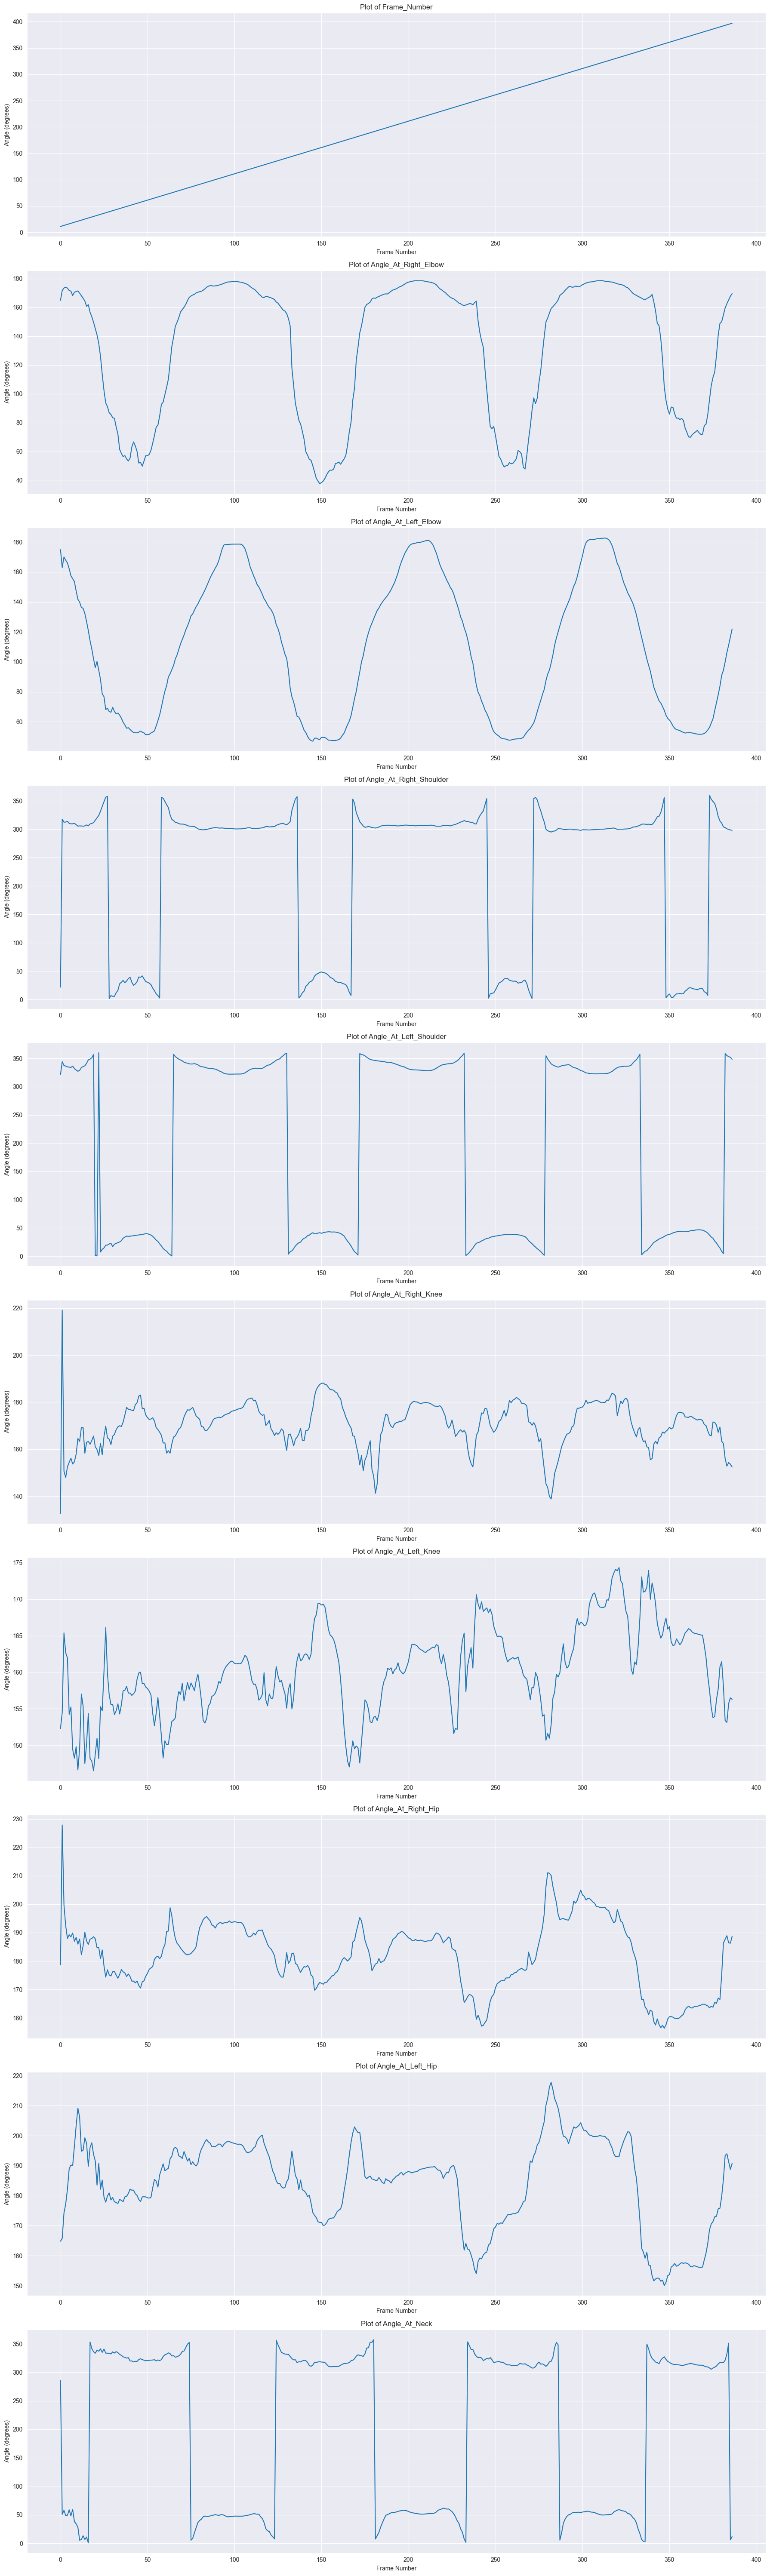

In [15]:
# Set 'Frame_Number' column as the index for easier plotting
Angles_df.set_index('Frame_Number', inplace=False)

# Plot each column (angle) against the frame number in separate subplots
fig, axes = plt.subplots(nrows=len(Angles_df.columns), ncols=1, figsize=(18, 6 * len(Angles_df.columns)))

for i, column in enumerate(Angles_df.columns):
    ax = axes[i] if len(Angles_df.columns) > 1 else axes  # Select the appropriate subplot
    ax.plot(Angles_df.index, Angles_df[column])
    ax.set_xlabel('Frame Number')
    ax.set_ylabel('Angle (degrees)')
    ax.set_title(f'Plot of {column}')
    ax.grid(True)

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

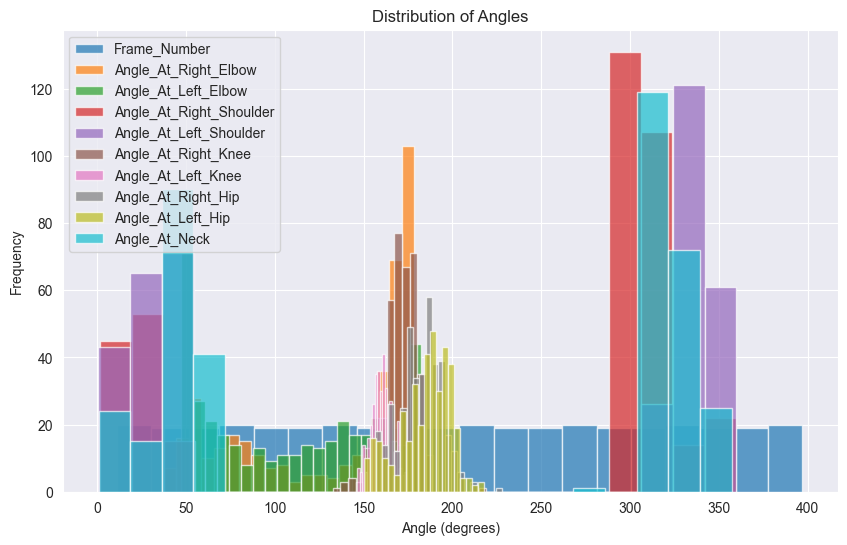

In [16]:
Angles_df.set_index('Frame_Number', inplace=False)

# Plot histograms for each column (angle) against the frame number
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for column in Angles_df.columns:
    plt.hist(Angles_df[column], bins=20, alpha=0.7, label=column)

plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Angles')
plt.legend()
plt.grid(True)
plt.show()

##Check for outliers and similarity

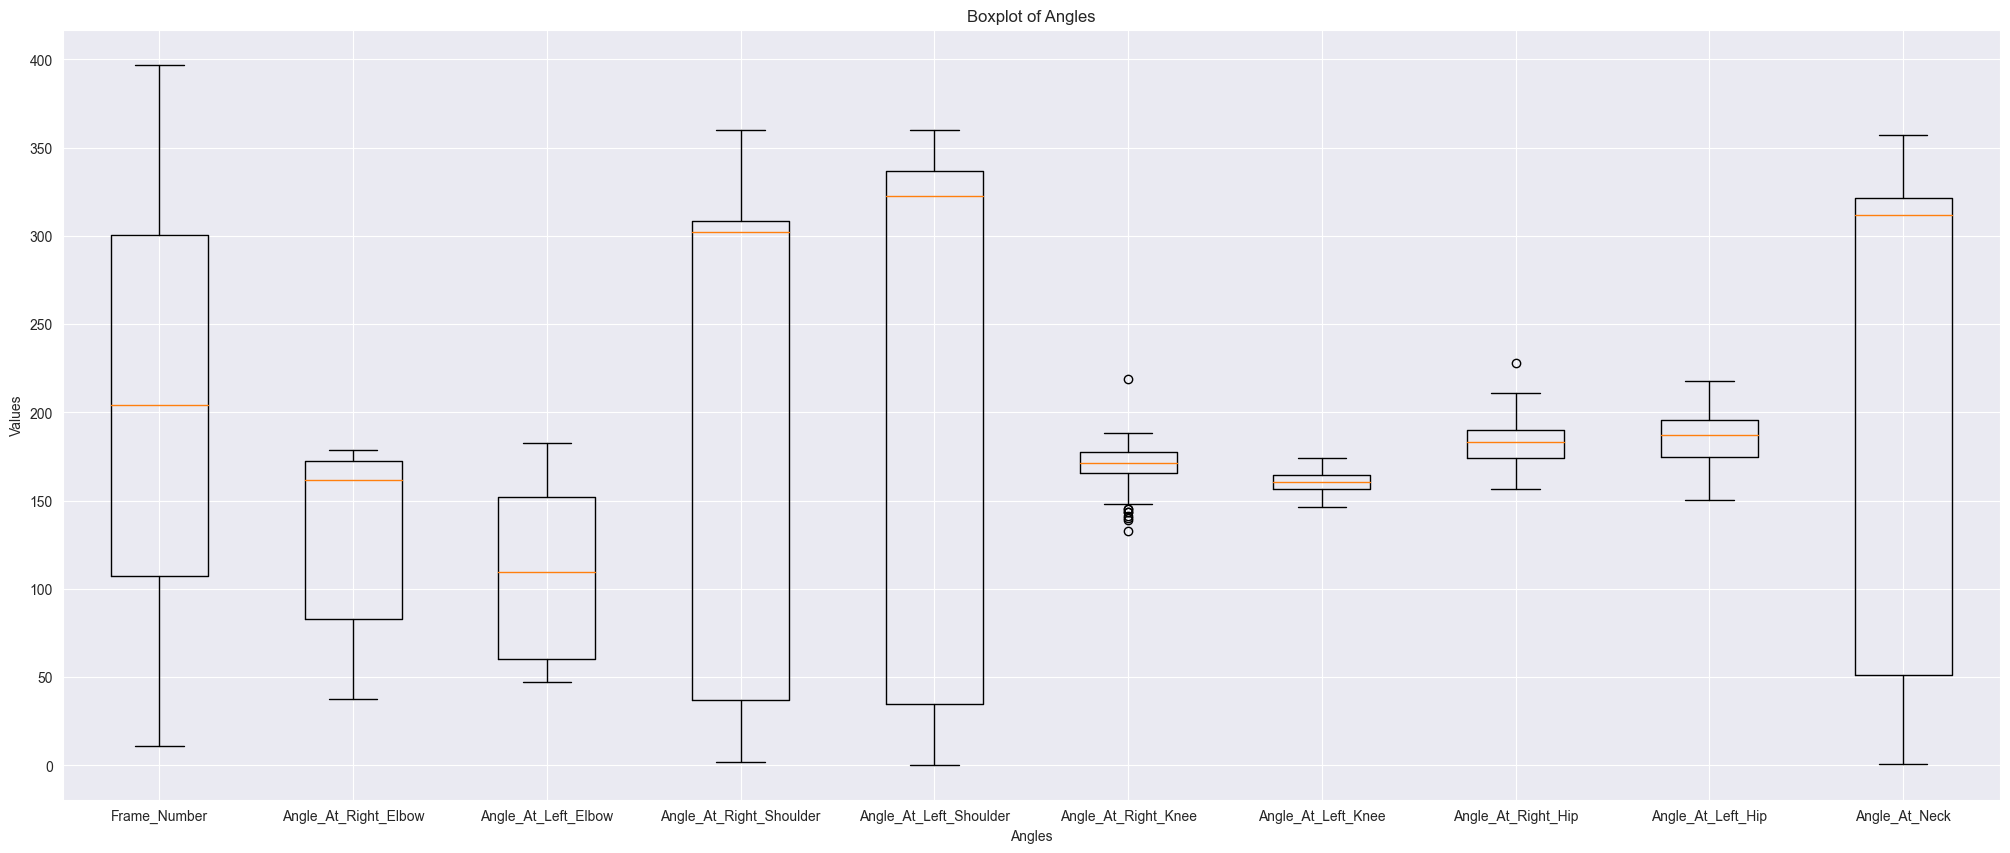

In [17]:
Angles_df.set_index('Frame_Number', inplace=False)

# Plot boxplots for each column (angle) against the frame number
plt.figure(figsize=(25, 10))  # Adjust figure size as needed
plt.boxplot(Angles_df.values, labels=Angles_df.columns)

plt.xlabel('Angles')
plt.ylabel('Values')
plt.title('Boxplot of Angles')
# plt.legend()
plt.grid(True)
plt.show()

##Normalize data

In [18]:
Angles_df

,Frame_Number,Angle_At_Right_Elbow,Angle_At_Left_Elbow,Angle_At_Right_Shoulder,Angle_At_Left_Shoulder,Angle_At_Right_Knee,Angle_At_Left_Knee,Angle_At_Right_Hip,Angle_At_Left_Hip,Angle_At_Neck
0,11,164.900213,174.850113,21.871791,321.401825,132.670667,152.282742,178.633216,164.828972,285.560476
1,12,171.681053,162.909836,317.888063,344.212528,219.130279,154.458021,227.926444,165.775858,50.833785
2,13,173.464632,169.991181,312.484949,337.285886,150.625724,165.389093,199.784260,174.229535,58.090823
3,14,174.042065,167.750144,312.757445,336.512367,147.902248,162.665008,192.406042,177.227433,48.803733
4,15,173.397460,165.968670,313.937769,334.964222,152.489376,161.959365,187.981711,182.183693,49.346327
...,...,...,...,...,...,...,...,...,...,...
382,393,159.641628,99.994627,302.852442,358.562340,155.941821,153.386439,187.682500,193.395184,321.426590
383,394,162.616964,106.175721,300.762503,354.914694,152.765433,153.124623,188.921274,193.979480,332.015422
384,395,165.137839,111.189898,299.991363,353.236223,154.289443,155.720595,186.431442,191.325187,351.098075
385,396,167.743894,116.517977,298.769741,351.848019,153.552061,156.486992,186.279836,188.811858,6.258279


##Save angles data to excel file

In [19]:
file_name = 'angles_data_' + video_name.split('.')[0] + '.xlsx'

Angles_df.to_excel(dataset_path + '/' + file_name, index=False)

print(f"Data saved to {file_name}")

Data saved to angles_data_PushUp2.xlsx
